# Linear Regression - Regression
Linear regression relates a continuous response (dependent) variable to one or more predictors (features, independent variables), using the assumption that the relationship is linear in nature:
- The relationship between each feature and the response is a straight line when we keep other features constant
- The slope of this line does not depend on the values of the other variables
- The effects of each variable on the response are addictive (but we can include new variables that represent the interaction of two variables)

In other words, the model assumes that the response variable can be explained or predicted by a linear combination of the features, except for random deviations from this linear relationship

### Imports & Settings

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [77]:
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

### Simple Regression
#### Generate random data

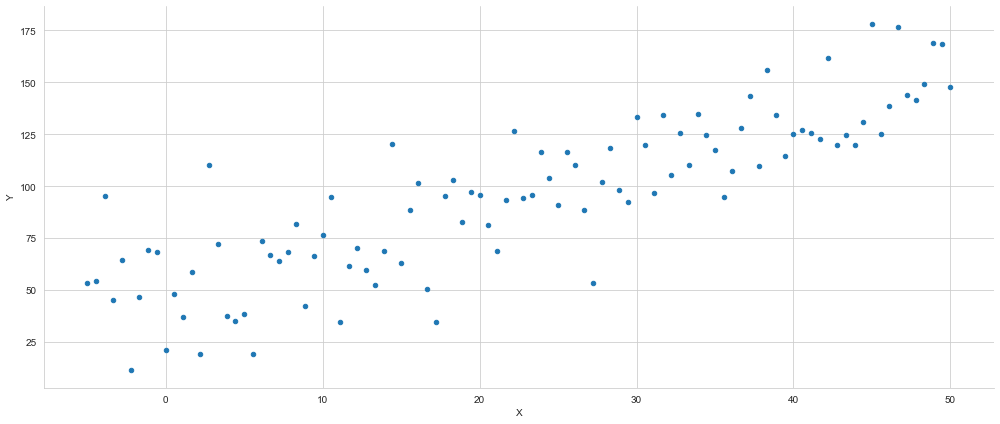

In [78]:
x = np.linspace(-5, 50, 100)
y = 50 + 2*x +np.random.normal(0,20, size=len(x))
data = pd.DataFrame({'X':x, 'Y':y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14,6))
sns.despine()
plt.tight_layout()

Our linear model with a single independent variable on the left-hand side assumes the following:

$$y = \beta_0 + \beta_1 X_1 + \epsilon$$

$\epsilon$ account for the deviation or errors that we will encounter when our data do not fit a straight line. When $\epsilon$ materializes, that is when we run the model of this type on actual data, the errors are called `residual`.

### Estimate a simple regression with statsmodels

The upper part of the summary displays the dataset characteristics, namely the estimation method, the number of observations and parameters, and indicates that the standard error estimates do not account for heteroskedasticity

The middle panel shoes the coefficent values that closely reflect the artifical data generating process. We can confirm that the estimates displayed in the middle of the summary result can be obtained using the OLS formula derived previously:

In [79]:
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     258.9
Date:                Fri, 13 May 2022   Prob (F-statistic):           2.92e-29
Time:                        14:15:29   Log-Likelihood:                -442.13
No. Observations:                 100   AIC:                             888.3
Df Residuals:                      98   BIC:                             893.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.6538      3.504     13.885      0.0

#### Verify calculation

In [80]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

const   48.65
X        2.04
dtype: float64

In [81]:
beta

array([48.65375929,  2.04080163])

### Display model & residuals

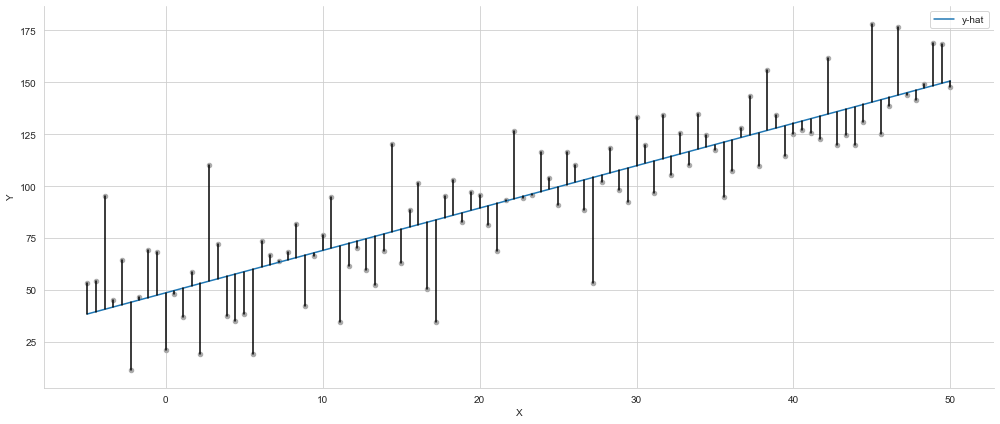

In [82]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax)
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')
sns.despine()
plt.tight_layout()

### Multiple Regression

For two independent variables, the model simply changes as follows:
$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon $$

### Generate new random data

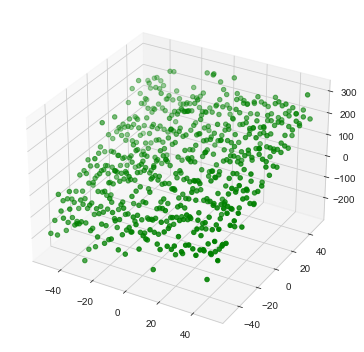

In [83]:
## Create data
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50,50, size), indexing='ij')
data = pd.DataFrame({'X_1':X_1.ravel(), 'X_2':X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

## Plot
three_dee = plt.figure(figsize=(15,5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
plt.tight_layout();

In [84]:
X = data[['X_1','X_2']]
y = data['Y']

#### Estimate multiple regression model with statsmodel
The upper right part of the panel display the goodness-of-fit measure just discussed, alongside the F-test that reject the hypothesis that all coefficients are zero and irrelevant. Similarly, the t-statistics indicate that intercept and both slope coefficients are, unsurprisingly, highly significant.

The bottom part of the summary contains the residual diagonstics. The left panel displays skew and kurtosis that are used to test the normality hypothesis. Both the Omnibus and the Jarque-Bera test fails to reject the null hypothesis that the residual are normally distributed. The Durbin-Watson statistics tests for serial correlation in the residuals and has a value near 2, which, given 2 parameters and 625 observations, fails to reject the hypothesis for no serial correlation

Lastly, the condition number provides evidence about multicollinearity: it is the ratio of the square roots of the largest and the smallest eigenvalue of the design matrix that contains the input data. A value above 30 suggests that the regression may have significant multicollinearity.

In [85]:
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     1113.
Date:                Fri, 13 May 2022   Prob (F-statistic):          3.35e-206
Time:                        14:15:31   Log-Likelihood:                -3332.5
No. Observations:                 625   AIC:                             6671.
Df Residuals:                     622   BIC:                             6684.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7359      2.007     24.782      0.0

#### Verify computation

In [87]:
np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))

array([49.73591455,  0.94793774,  3.005241  ])

#### Convert regression analysis output into an image

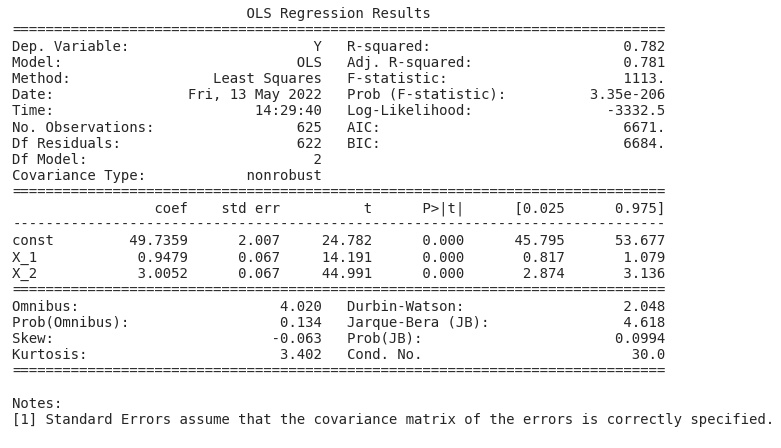

In [100]:
plt.rc('figure', figsize=(12,7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize':14}, fontproperties='monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=.8, top=0.8, bottom=0.1)
# plt.savefig('multiple_regression_summary.png', bbox_inches='tight', dpi=300)